<a href="https://colab.research.google.com/github/RubenSierraSerrano/Practica1-AprendizajeAutomatico/blob/main/Practica_B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO B02**    

Rubén Sierra Serrano                                      
Paula Diz Diz      
Lucía de Angulo Pelayo

# Práctica 1:Red Neuronal

## Enunciado del problema a resolver
<p align="justify">
Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y
clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

<p align="justify">
Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y muy parecido al que vimos en clase de reconocimiento de cifras.
Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles)

<p align="justify">
Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la
precisión con la que la red aprende a clasificar las imágenes

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Cargamos el conjunto de datos Fashion-MNIST en keras:

In [ ]:
from keras.datasets import fashion_mnist # importa de keras la base de datos

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

*   train_images y train_labels son el conjunto de entrenamiento (los datos de los que aprenderá el modelo)
*    test_images y test_labels son el conjunto de pruebas (los datos con los
que testearemos el modelo ya entrenado).

<p align="justify">
Las imágenes están codificadas como matrices Numpy, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1)

Vamos a comprobar los datos de entrenamiento y de testeo:

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Vamos a ver como se representa un elemento de nuestra base de datos, escogemos la sexta imagen:

In [ ]:
train_labels[5]

2

La etiqueta 2 corresponde con un 'pullover', que es un jersey. Ahora vamos a mostrarlo gráficamente:

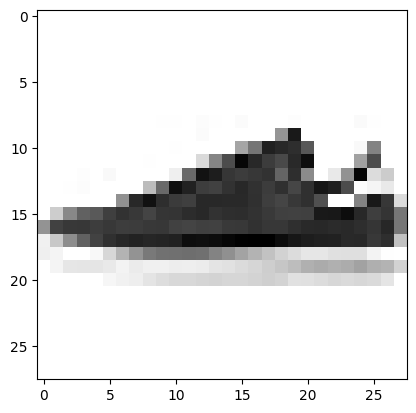

In [ ]:
import matplotlib.pyplot as plt
prenda = train_images[6]
plt.imshow(prenda, cmap=plt.cm.binary)
plt.show()

Otra cosa interesante que también podemos hacer es visualizar las 50 primeras imágenes con sus respectivas etiquetas:

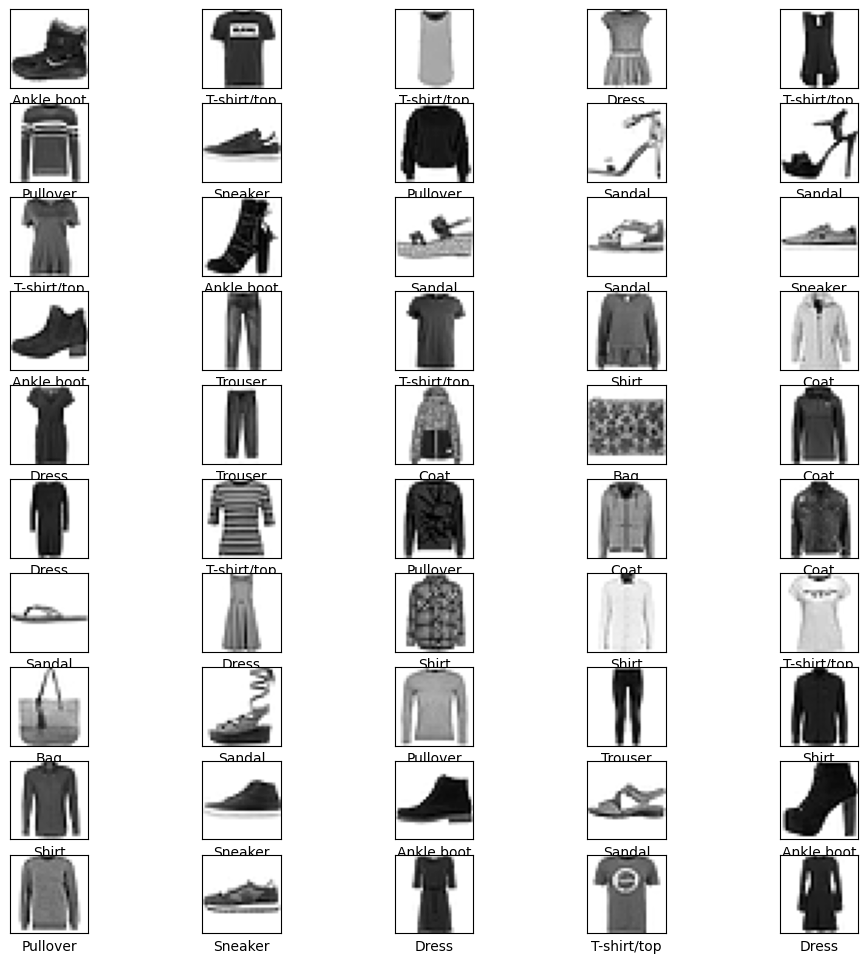

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle boot"]
plt.figure(figsize =(12, 12))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**NORMALIZACIÓN**
<p align = "justify">
Vamos a realizar una normalización que facilite a la red neuronal la convergencia en el entrenamiento, no se usan datos con valores que sean mucho más grandes que los valores de los pesos de la red, o datos que sean heterogéneos de rango entre ellos, vamos a dividir entre 255 para que los datos estén en el rango [0,1]:

In [ ]:
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]
test_images = test_images.astype('float32') / 255

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
60000
(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   3   0   0   0   0 251 199 172 195 152   0   0   0   0   3

In [ ]:
train_images, len(train_images), train_images.shape, train_images[5]

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


<p align = "justify">
También tenemos que codificar categóricamente las etiquetas, las ponemos en el formato one-hot encoding, facilitando el output de las redes:

In [ ]:
from keras import utils
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**1. Configurar y entrenar los modelos**

<p align = "justify">
Vamos a usar flatten para que transforme los datos de entrada, que son imágenes, en arrays de una dimensión. Esto lo hacemos porque las imágenes son arrays bidimensionales.

<p align = "justify">
También agregamos dos capas densas, es decir, todas las neuronas de la capa están conectadas con todas las neuronas de la capa anterior.

<p align = "justify">
La función de activación de la segunda capa densa es softmax porque funciona especialmente bien para casos de clasificación en varias clases. La función softmax toma como entrada un vector de valores reales y produce un nuevo vector en la que cada elemento es una probabilidad que representa la "confianza" de que la entrada pertenezca a una de las clases previamente mencionadas, haciendo que sea idónea para nuestra red.

In [ ]:
from keras import models
from keras import layers


# Definir una función para crear y entrenar el modelo
def train_model(neurons, activation, optimizer, epochs, train_images, train_labels):
    modelo = models.Sequential()
    modelo.add(layers.Flatten(input_shape=train_images.shape[1:]))
    modelo.add(layers.Dense(neurons, activation=activation))
    modelo.add(layers.Dense(10, activation="softmax"))

    modelo.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    modelo.fit(train_images, train_labels, epochs=epochs, batch_size=128)

    return modelo

# Entrenar y evaluar cada modelo

# CASO 1
caso_1 = train_model(10, 'relu', 'sgd', 5, train_images, train_labels)

# CASO 2
caso_2 = train_model(10, 'relu', 'rmsprop', 5, train_images, train_labels)

# CASO 3
caso_3 = train_model(10, 'sigmoid', 'sgd', 5, train_images, train_labels)

# CASO 4
caso_4 = train_model(10, 'sigmoid', 'rmsprop', 5, train_images, train_labels)

# CASO 5
caso_5 = train_model(512, 'relu', 'sgd', 5, train_images, train_labels)

# CASO 6
caso_6 = train_model(512, 'relu', 'rmsprop', 5, train_images, train_labels)

# CASO 7
caso_7 = train_model(512, 'sigmoid', 'sgd', 5, train_images, train_labels)

# CASO 8
caso_8 = train_model(512, 'sigmoid', 'rmsprop', 5, train_images, train_labels)

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 1.5464 - accuracy: 0.4602
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.8808 - accuracy: 0.6996
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7312 - accuracy: 0.7513
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6638 - accuracy: 0.7751
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6236 - accuracy: 0.7885
Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 0.8104 - accuracy: 0.7247
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5125 - accuracy: 0.8250
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4692 - accuracy: 0.8380
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4484 - accuracy: 0.8460
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4350 - accuracy: 0.8502
Epoch 1/5


Mostramos los resumenes de los modelos:

Resumen de Caso 1:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


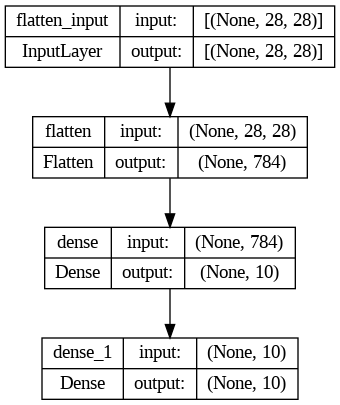





Resumen de Caso 2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


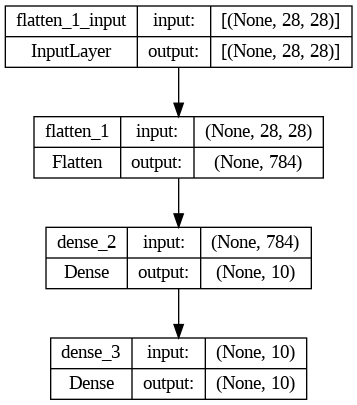





Resumen de Caso 3:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


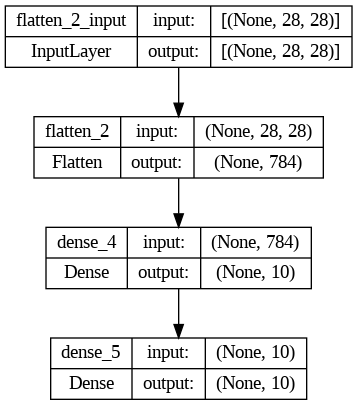





Resumen de Caso 4:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


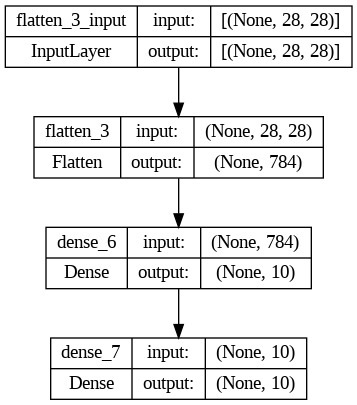





Resumen de Caso 5:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


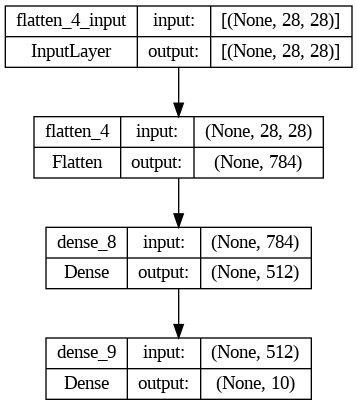





Resumen de Caso 6:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


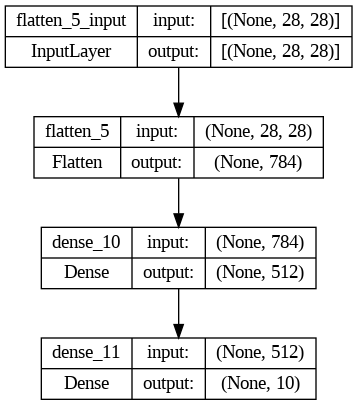





Resumen de Caso 7:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


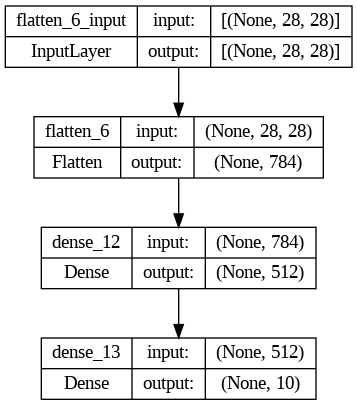





Resumen de Caso 8:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


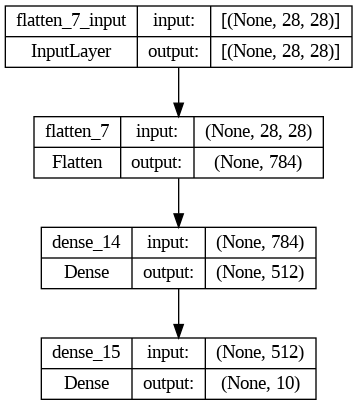

In [ ]:
from IPython.display import Image
modelos = [
    (caso_1, "Caso 1"),
    (caso_2, "Caso 2"),
    (caso_3, "Caso 3"),
    (caso_4, "Caso 4"),
    (caso_5, "Caso 5"),
    (caso_6, "Caso 6"),
    (caso_7, "Caso 7"),
    (caso_8, "Caso 8")
]

# Imprimir los resúmenes de los modelos
for modelo, nombre_caso in modelos:
    print(f"Resumen de {nombre_caso}:")
    modelo.summary()
    keras.utils.plot_model(modelo, "modelo.png", show_shapes=True)
    display(Image("modelo.png"))
    print("\n" + "="*65 + "\n\n\n")

**SUMMARY Redes con 10 neuronas en la capa 1**
<p align="justify">
La red neuronal tiene dos capas (una de entrada y otra de salida) densas, es decir, todas las neuronas están conectadas con las neuronas de la capa anterior, ambas capas tienen la función de activación: ReLU o sigmoid y emplean o bien el optimizador descenso del gradiente estocástico (sgd) o bien la propagación de la raíz cuadrática media (rmsprop).
<p align="justify">
En cuanto al número de parámetros, la primera capa densa tiene 7850 parámetros, y la segunda capa tiene 110 parámetros. Esto se debe a que cada neurona en una capa densa se conecta con todas las neuronas de la capa anterior, y cada conexión tiene un peso y un sesgo asociados.
En este caso, 784 (dimensiones de entrada) * 10 (neuronas) = 7840 para la primera capa más 10 sesgos, y 10 * 10 = 100 para la segunda capa más 10 sesgos,es decir, 7960 parámetros en total.
<p align="justify">
Los 7960 son entrenables, lo que quiere decir que la red neuronal ajustará los valores de estos parámetros durante el proceso de entrenamiento para minimizar la función de pérdida.


**SUMMARY 2 Redes con 512 neuronas en la capa 2**
<p align="justify">
La red neuronal tiene dos capas (una de entrada y otra de salida) densas, es decir, todas las neuronas están conectadas con las neuronas de la capa anterior, ambas capas tienen la función de activación: ReLU o sigmoid y emplean o bien el optimizador descenso del gradiente estocástico (sgd) o bien la propagación de la raíz cuadrática media (rmsprop).
<p align="justify">
En cuanto al número de parámetros, la primera capa densa tiene 401920 parámetros, y la segunda capa tiene 5130 parámetros. Esto se debe a que cada neurona en una capa densa se conecta con todas las neuronas de la capa anterior, y cada conexión tiene un peso y un sesgo asociados.
En este caso, 784 (dimensiones de entrada) * 512 (neuronas) = 401408 para la primera capa más 512 sesgos, y 512 * 10 = 5120 para la segunda capa más 10 sesgos,es decir, 407050 parámetros en total.
<p align="justify">
Los 407050 son entrenables, lo que quiere decir que la red neuronal ajustará los valores de estos parámetros durante el proceso de entrenamiento para minimizar la función de pérdida.

**3. Analizar e interpretar los resultados del caso 2 y 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento.**

In [ ]:
caso_9 = train_model(10,'relu','rmsprop',25,train_images,train_labels)
caso_10 = train_model(512, 'sigmoid', 'sgd', 25, train_images, train_labels)
caso_9.summary()
caso_10.summary()

Epoch 1/25
469/469 [==============================] - 3s 4ms/step - loss: 0.8794 - accuracy: 0.6933
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.5372 - accuracy: 0.8155
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.8319
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4584 - accuracy: 0.8397
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.8470
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4285 - accuracy: 0.8510
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4187 - accuracy: 0.8549
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8563
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4044 - accuracy: 0.8592
Epoch 10/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3992 - accuracy: 0.8618

**Modelo 1.** 5 epochs.
10 neuronas iniciales.
Función de activación ReLU.
Optimizador RMSprop:

<p align="justify">
Este modelo comienza con una precisión de aproximadamente el 74% y muestra una mejora constante a lo largo de las 5 épocas, alcanzando una precisión de alrededor del 84% al final de las 5 épocas. La elección de la función de activación ReLU y el optimizador RMSprop parece adecuada para este problema, ya que el modelo converge de manera efectiva.

**Modelo 2.** 5 epochs.
512 neuronas iniciales.
Función de activación Sigmoid.
Optimizador SGD:

<p align="justify">
Este modelo comienza con una precisión de alrededor del 58% y muestra una mejora a medida que avanzan las épocas, llegando a aproximadamente el 75% de precisión al final de las 5 épocas. La elección de una función de activación Sigmoid y el optimizador SGD podría estar influyendo en la velocidad de convergencia, y podría requerir un ajuste más fino para obtener mejores resultados.

**Modelo 9.** 25 epochs.
10 neuronas iniciales.
Función de activación ReLU.
Optimizador RMSprop:

<p align="justify">
Este modelo comienza con una precisión de alrededor del 74% (similar al Modelo 1) y muestra una mejora constante a lo largo de las 25 épocas. Al final de las 25 épocas, alcanza una precisión de aproximadamente el 87%. La elección de la función de activación ReLU y el optimizador RMSprop es efectiva para este problema y permite un rendimiento sólido con entrenamiento más prolongado.

**Modelo 10.**
25 epochs.
512 neuronas iniciales.
Función de activación Sigmoid.
Optimizador SGD:

<p align="justify">
Este modelo comienza con una precisión de alrededor del 60% y muestra una mejora a lo largo de las 25 épocas, alcanzando alrededor del 82% de precisión al final. Al igual que en el Modelo 2, la elección de la función de activación Sigmoid y el optimizador SGD podría estar influyendo en la velocidad de convergencia, pero un entrenamiento más largo permite una mejora significativa en la precisión.

<p align="justify">
Sin embargo, hay que tener en cuenta que en los modelos con 25 épocas, existe un riesgo de sobreentrenamiento (overfitting). El sobreentrenamiento ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos.

**4. Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba**


Resumen de Caso 1:
313/313 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.7838
test_loss: 0.6292874217033386
test_acc: 0.7838000059127808
313/313 [==============================] - 1s 1ms/step


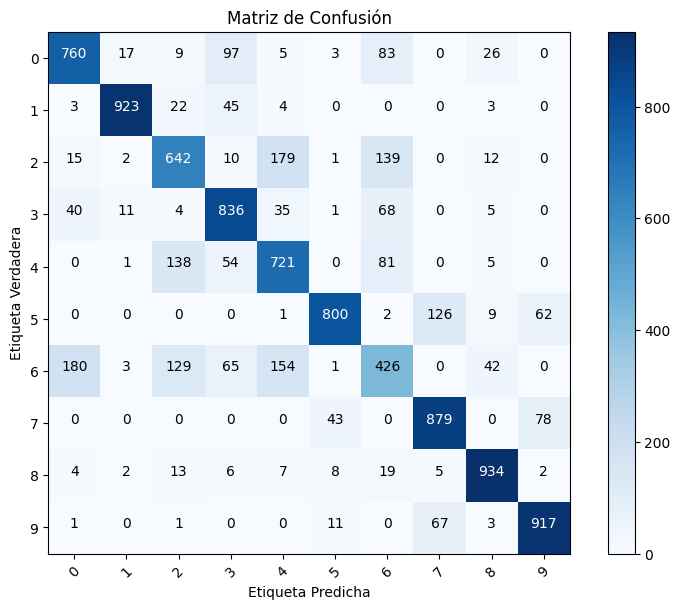





Resumen de Caso 2:
313/313 [==============================] - 1s 2ms/step - loss: 0.4925 - accuracy: 0.8278
test_loss: 0.49249136447906494
test_acc: 0.8277999758720398
313/313 [==============================] - 0s 1ms/step


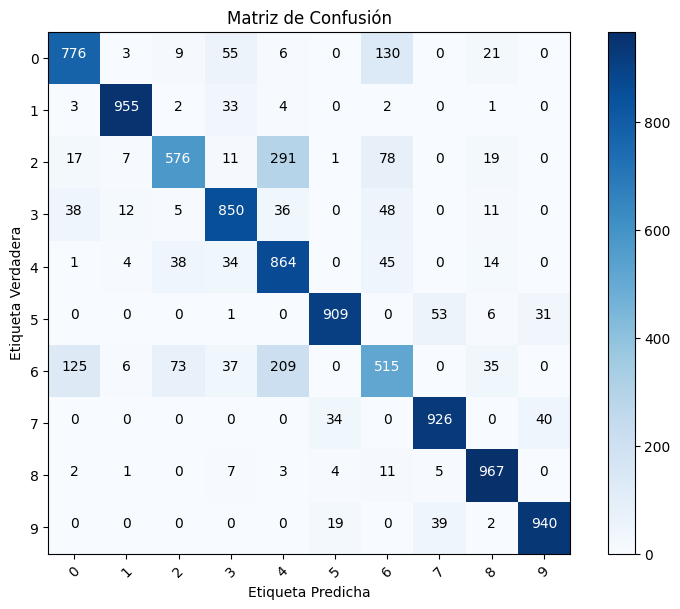





Resumen de Caso 3:
313/313 [==============================] - 1s 2ms/step - loss: 1.2921 - accuracy: 0.6477
test_loss: 1.2920597791671753
test_acc: 0.6477000117301941
313/313 [==============================] - 1s 1ms/step


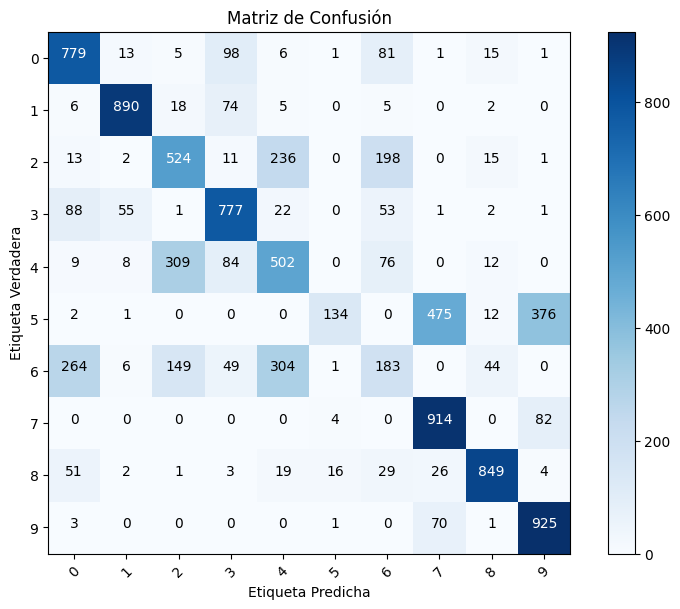





Resumen de Caso 4:
313/313 [==============================] - 1s 2ms/step - loss: 0.5168 - accuracy: 0.8251
test_loss: 0.5168141722679138
test_acc: 0.8251000046730042
313/313 [==============================] - 1s 2ms/step


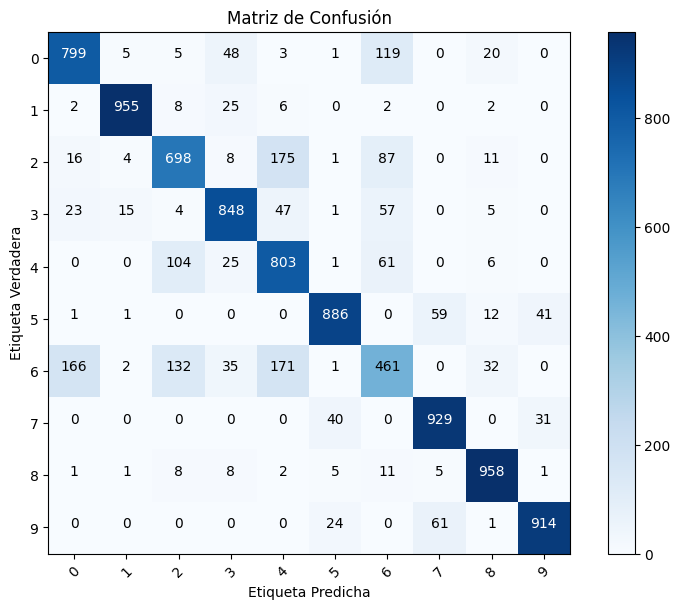





Resumen de Caso 5:
313/313 [==============================] - 2s 7ms/step - loss: 0.5294 - accuracy: 0.8170
test_loss: 0.5293521285057068
test_acc: 0.8169999718666077
313/313 [==============================] - 2s 6ms/step


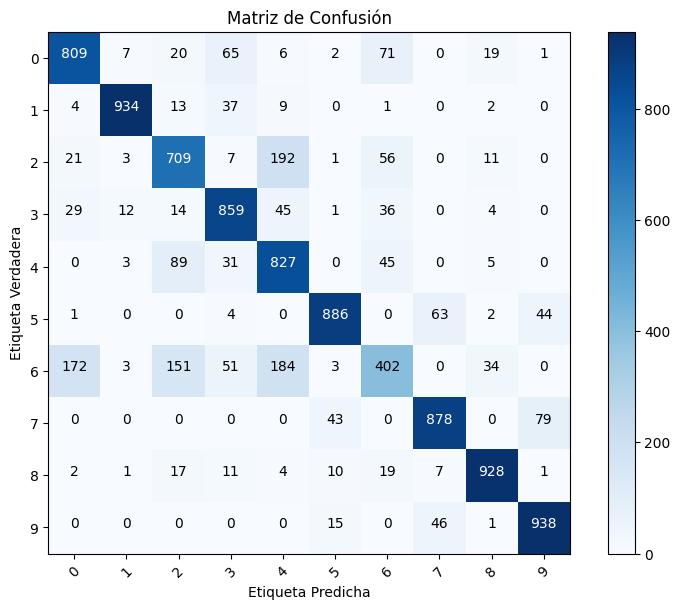





Resumen de Caso 6:
313/313 [==============================] - 2s 6ms/step - loss: 0.3469 - accuracy: 0.8766
test_loss: 0.3469100892543793
test_acc: 0.8766000270843506
313/313 [==============================] - 2s 5ms/step


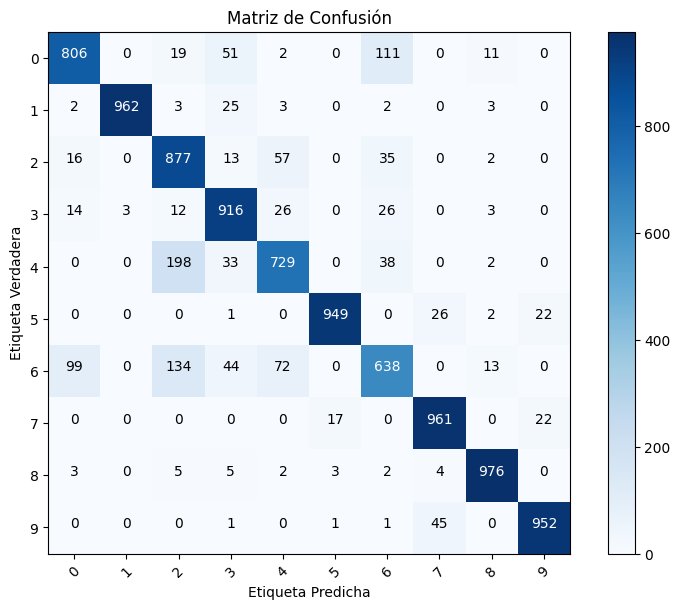





Resumen de Caso 7:
313/313 [==============================] - 1s 3ms/step - loss: 0.7566 - accuracy: 0.7460
test_loss: 0.7565822601318359
test_acc: 0.7459999918937683
313/313 [==============================] - 2s 7ms/step


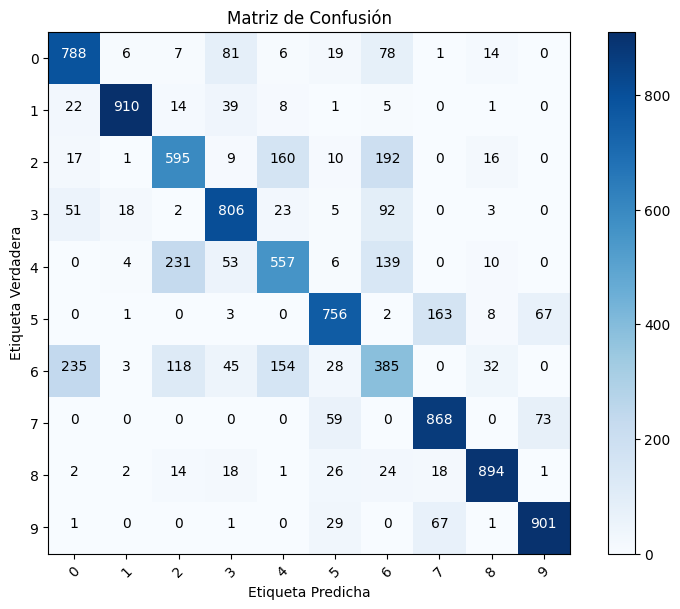





Resumen de Caso 8:
313/313 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8561
test_loss: 0.39728105068206787
test_acc: 0.8561000227928162
313/313 [==============================] - 1s 3ms/step


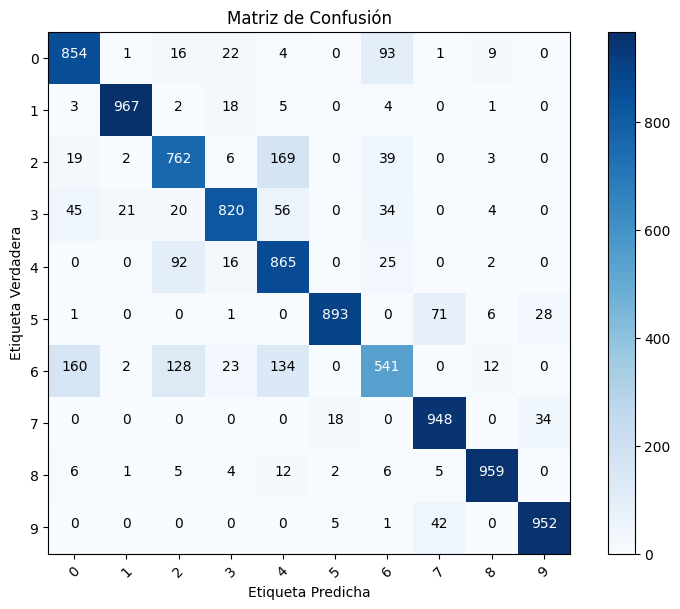

In [ ]:
def plot_confusion_matrix(model, test_images, test_labels, class_names):
    # Realizar las predicciones
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Obtener las etiquetas verdaderas
    true_labels = np.argmax(test_labels, axis=1)

    # Calcular la matriz de confusión
    cm = confusion_matrix(true_labels, predicted_labels)

    # Crear una figura para mostrar la matriz de confusión
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Etiquetas en los cuadros
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()
class_names = [str(i) for i in range(10)]

for modelo, nombre_caso in modelos:
  print(f"Resumen de {nombre_caso}:")
  test_loss, test_acc = modelo.evaluate(test_images, test_labels)
  print('test_loss:', test_loss)
  print('test_acc:', test_acc)
  plot_confusion_matrix(modelo, test_images, test_labels, class_names)
  print("\n" + "="*65 + "\n\n\n")

**Caso 1:**


Parámetros totales: 7960

Test loss: 0.6210

Test accuracy: 0.7862

<p align="justify">
En este caso, se utiliza una red neuronal con dos capas Dense, cada una con 10 neuronas y activación ReLU. El optimizador es Stochastic Gradient Descent (SGD). La métrica de pérdida en el conjunto de prueba es de 0.6210, lo que significa que el modelo tiene un error promedio de 0.6210 en sus predicciones. La métrica de precisión es de 0.7862, lo que indica que el modelo es capaz de clasificar correctamente alrededor del 78.62% de las muestras en el conjunto de prueba.

**Caso 2:**


Parámetros totales: 7960

Test loss: 0.4753

Test accuracy: 0.8344

<p align="justify">
En este caso, se utiliza una estructura de red similar a la del caso 1, pero con un optimizador diferente, en este caso, RMSprop. Esto resulta en una mejora significativa en las métricas de desempeño. La métrica de pérdida en el conjunto de prueba es de 0.4753, lo que indica una reducción en el error promedio en comparación con el caso 1. La precisión también aumenta considerablemente a 0.8344, lo que significa que el modelo clasifica correctamente aproximadamente el 83.44% de las muestras.

**Caso 3:**


Parámetros totales: 7960

Test loss: 1.2938

Test accuracy: 0.6691

<p align="justify">
En este caso, se utiliza la función de activación sigmoid y el optimizador SGD. Los resultados son menos satisfactorios en comparación con los casos anteriores. La métrica de pérdida en el conjunto de prueba es significativamente alta (1.2938), lo que sugiere un alto error promedio en las predicciones. La precisión es del 66.91%, lo que indica que el modelo es capaz de clasificar correctamente alrededor del 66.91% de las muestras en el conjunto de prueba.

**Caso 4:**


Parámetros totales: 7960

Test loss: 0.5261

Test accuracy: 0.8282

<p align="justify">

En este caso, se utiliza la misma estructura de red que en el caso 2, pero con la función de activación sigmoid y el optimizador RMSprop. Los resultados son competitivos con el caso 2, con una métrica de pérdida de 0.5261 y una precisión de 0.8282. Esto indica que este modelo también tiene un buen desempeño en la clasificación de las muestras del conjunto de prueba.

**Caso 5:**


Parámetros totales: 407050

Test loss: 0.5238

Test accuracy: 0.8206

<p align="justify">
Este caso introduce un cambio significativo al utilizar una capa con 512 neuronas en la red. A pesar de tener muchas más parámetros (lo que puede aumentar el riesgo de sobreajuste), el modelo logra un buen desempeño. La métrica de pérdida es de 0.5238, y la precisión es de 0.8206, lo que indica que el modelo clasifica correctamente alrededor del 82.06% de las muestras en el conjunto de prueba.

**Caso 6:**


Parámetros totales: 407050

Test loss: 0.3420

Test accuracy: 0.8766

<p align="justify">
En este caso, se utiliza la función de activación ReLU y el optimizador RMSprop. El modelo mejora aún más, con una métrica de pérdida de 0.3420 y una precisión impresionante de 0.8766. Esto indica que el modelo tiene un error promedio muy bajo y clasifica correctamente alrededor del 87.66% de las muestras del conjunto de prueba.

**Caso 7:**

Parámetros totales: 407050

Test loss: 0.7484

Test accuracy: 0.7540

<p align="justify">
Este caso utiliza la función de activación sigmoid y el optimizador SGD. Aunque no es tan efectivo como el caso 6, el modelo aún logra una precisión del 75.40%. La métrica de pérdida es de 0.7484, lo que indica un error promedio relativamente más alto.

**Caso 8:**

Parámetros totales: 407050

Test loss: 0.4379

Test accuracy: 0.8383

<p align="justify">
El último caso utiliza la función de activación sigmoid y el optimizador RMSprop, y obtiene métricas de desempeño competitivas. La métrica de pérdida es de 0.4379, y la precisión es de 0.8383, lo que significa que el modelo clasifica correctamente aproximadamente el 83.83% de las muestras en el conjunto de prueba.

En resumen, estos resultados demuestran la influencia significativa que tienen la arquitectura del modelo, la función de activación y el optimizador en el rendimiento de una red neuronal. Los casos 6 y 8 destacan por su alta precisión y baja pérdida, mientras que el caso 3 muestra un rendimiento inferior.

**5. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de
test (test_images[5])**



1/1 [==============================] - 0s 20ms/step
Predicción del Modelo 1: Trouser
Predicción del Modelo 2: Trouser
Predicción del Modelo 3: Trouser
Predicción del Modelo 4: Trouser
Predicción del Modelo 5: Trouser
Predicción del Modelo 6: Trouser
Predicción del Modelo 7: Trouser
Predicción del Modelo 8: Trouser


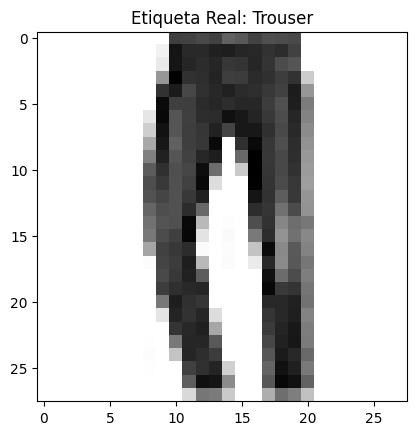

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle boot"]
caso_1_pred = caso_1.predict(np.expand_dims(test_images[5], axis=0))
caso_2_pred = caso_2.predict(np.expand_dims(test_images[5], axis=0))
caso_3_pred = caso_3.predict(np.expand_dims(test_images[5], axis=0))
caso_4_pred = caso_4.predict(np.expand_dims(test_images[5], axis=0))
caso_5_pred = caso_5.predict(np.expand_dims(test_images[5], axis=0))
caso_6_pred = caso_6.predict(np.expand_dims(test_images[5], axis=0))
caso_7_pred = caso_7.predict(np.expand_dims(test_images[5], axis=0))
caso_8_pred = caso_8.predict(np.expand_dims(test_images[5], axis=0))

# Los resultados son probabilidades de pertenecer a cada clase, puedes usar argmax para obtener la clase predicha
pred_caso_1 = np.argmax(caso_1_pred)
pred_caso_2 = np.argmax(caso_2_pred)
pred_caso_3 = np.argmax(caso_3_pred)
pred_caso_4 = np.argmax(caso_4_pred)
pred_caso_5 = np.argmax(caso_5_pred)
pred_caso_6 = np.argmax(caso_6_pred)
pred_caso_7 = np.argmax(caso_7_pred)
pred_caso_8 = np.argmax(caso_8_pred)

# Imprimir las predicciones
print("Predicción del Modelo 1:", class_names[pred_caso_1])
print("Predicción del Modelo 2:", class_names[pred_caso_2])
print("Predicción del Modelo 3:", class_names[pred_caso_3])
print("Predicción del Modelo 4:", class_names[pred_caso_4])
print("Predicción del Modelo 5:", class_names[pred_caso_5])
print("Predicción del Modelo 6:", class_names[pred_caso_6])
print("Predicción del Modelo 7:", class_names[pred_caso_7])
print("Predicción del Modelo 8:", class_names[pred_caso_8])
plt.imshow(test_images[5].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Etiqueta Real: {class_names[np.argmax(test_labels[5])]}")
plt.show()

Podemos observar que los ocho modelos consiguen predecir correctamente la etiqueta de la sexta imagen de nuestra base de datos de test.

**6. Graficar cómo de bien o de mal se comporta el
modelo para cada uno de los 8 casos**


Caso 1
313/313 [==============================] - 1s 2ms/step


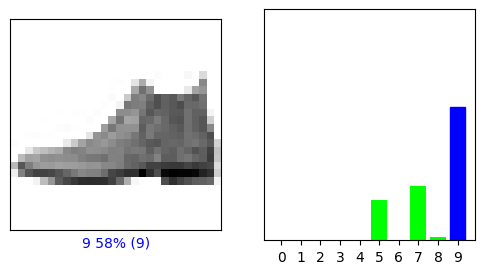

<Figure size 640x480 with 0 Axes>

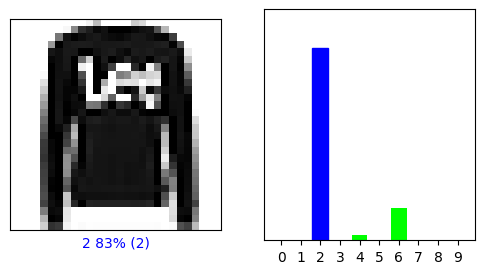

<Figure size 640x480 with 0 Axes>

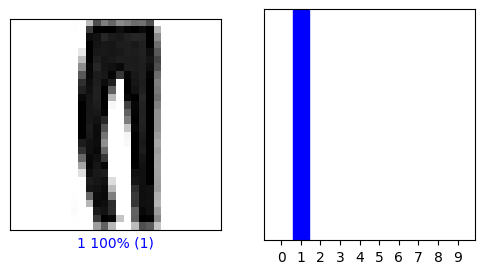

<Figure size 640x480 with 0 Axes>

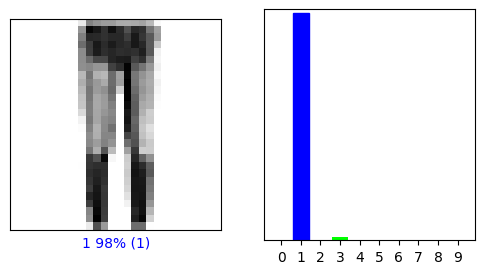

<Figure size 640x480 with 0 Axes>

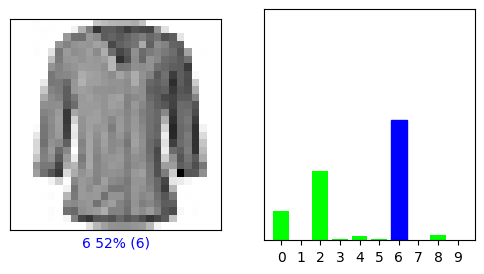

Caso 2
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

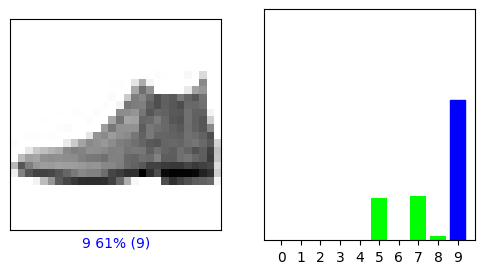

<Figure size 640x480 with 0 Axes>

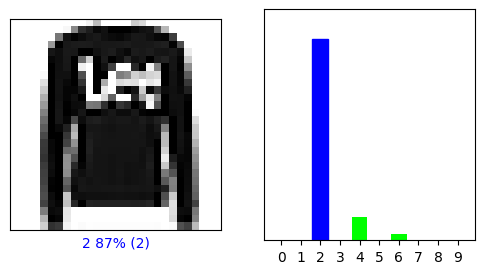

<Figure size 640x480 with 0 Axes>

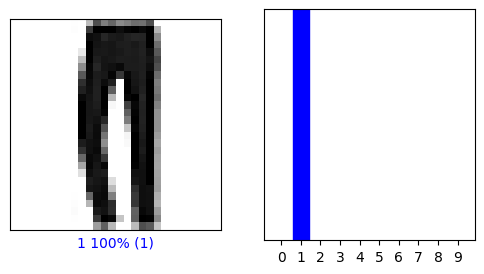

<Figure size 640x480 with 0 Axes>

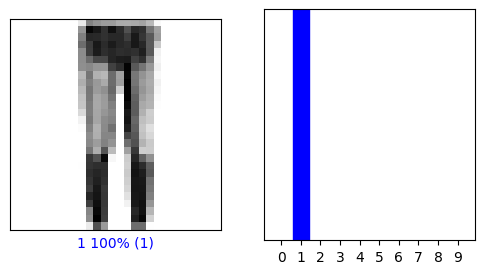

<Figure size 640x480 with 0 Axes>

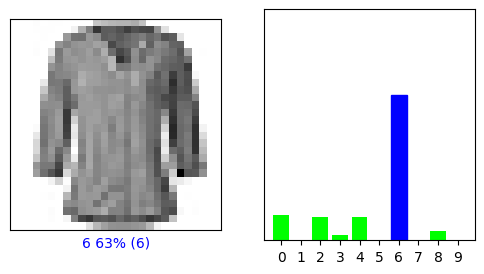

Caso 3
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

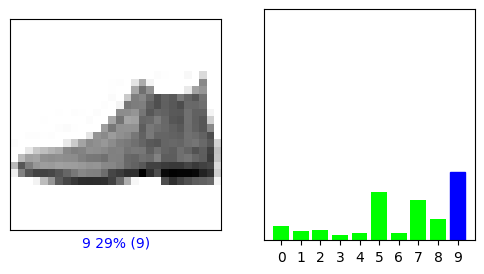

<Figure size 640x480 with 0 Axes>

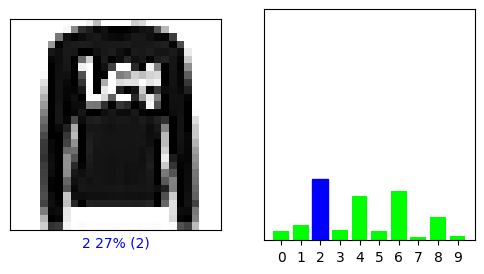

<Figure size 640x480 with 0 Axes>

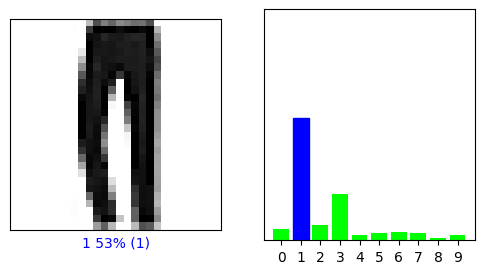

<Figure size 640x480 with 0 Axes>

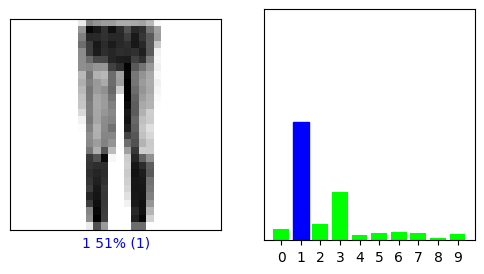

<Figure size 640x480 with 0 Axes>

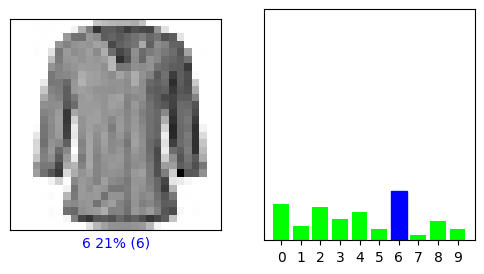

Caso 4
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

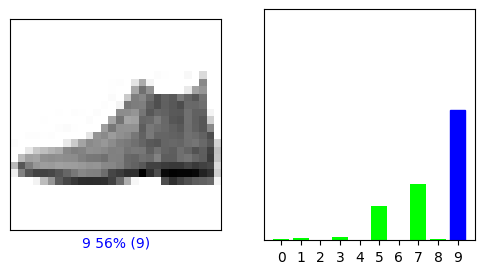

<Figure size 640x480 with 0 Axes>

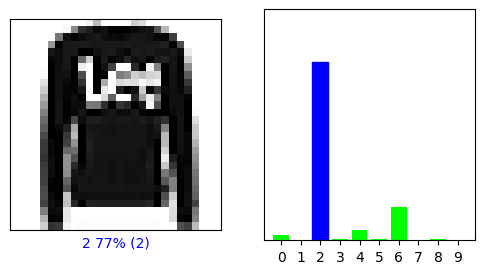

<Figure size 640x480 with 0 Axes>

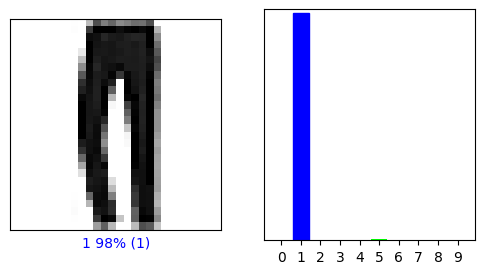

<Figure size 640x480 with 0 Axes>

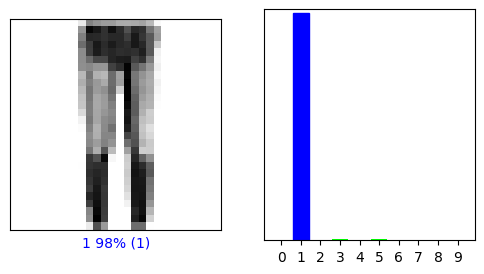

<Figure size 640x480 with 0 Axes>

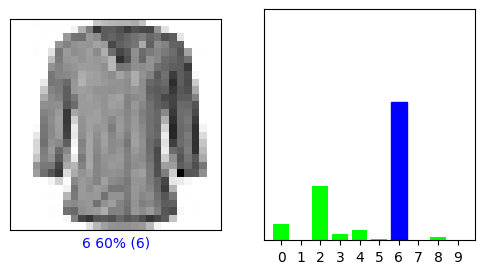

Caso 5
313/313 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

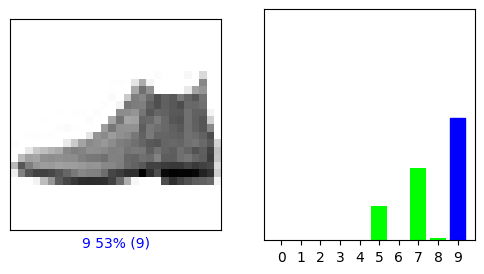

<Figure size 640x480 with 0 Axes>

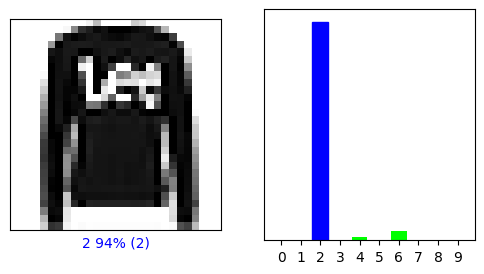

<Figure size 640x480 with 0 Axes>

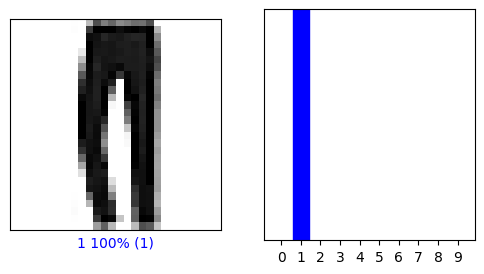

<Figure size 640x480 with 0 Axes>

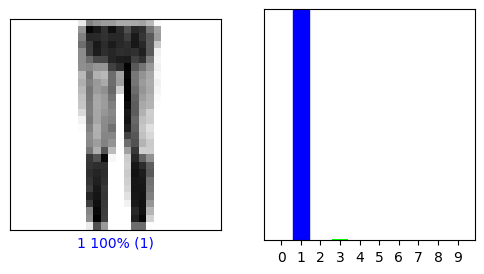

<Figure size 640x480 with 0 Axes>

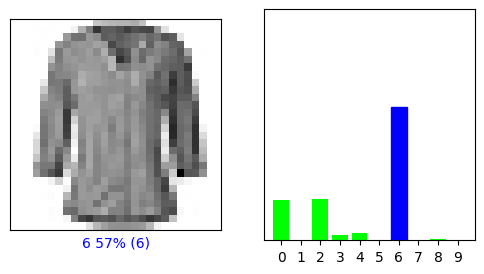

Caso 6
313/313 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

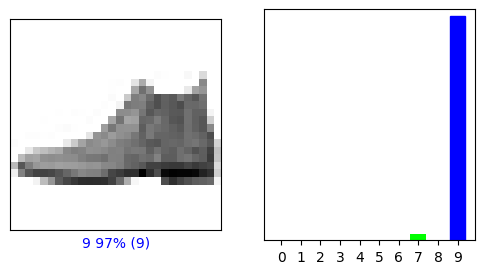

<Figure size 640x480 with 0 Axes>

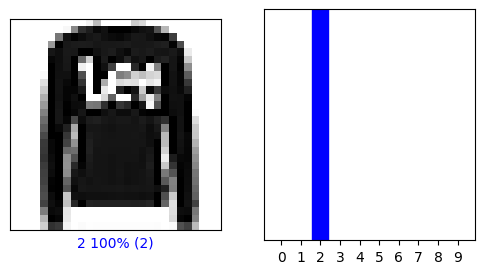

<Figure size 640x480 with 0 Axes>

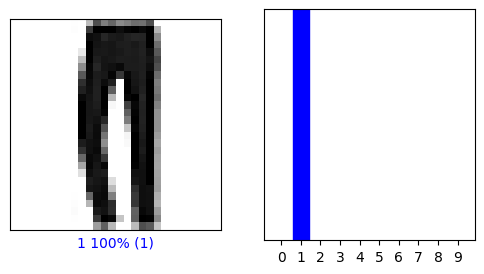

<Figure size 640x480 with 0 Axes>

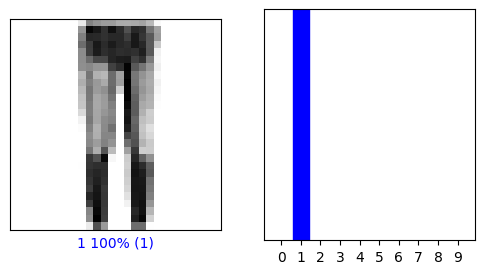

<Figure size 640x480 with 0 Axes>

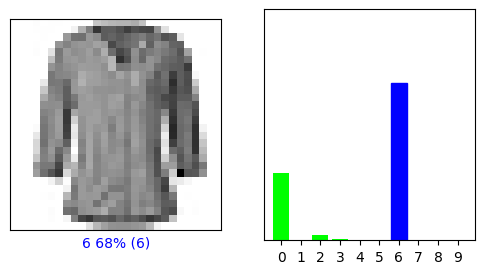

Caso 7
313/313 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

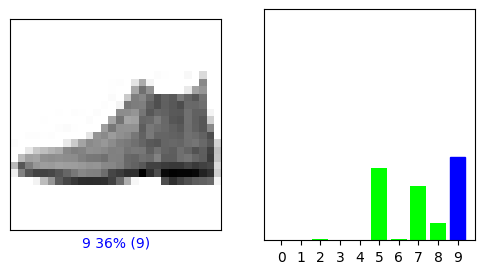

<Figure size 640x480 with 0 Axes>

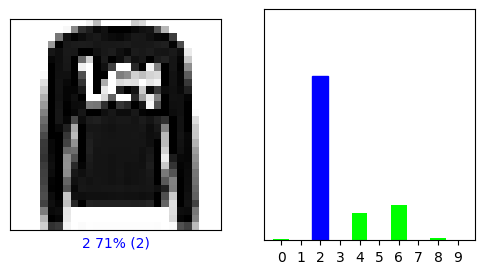

<Figure size 640x480 with 0 Axes>

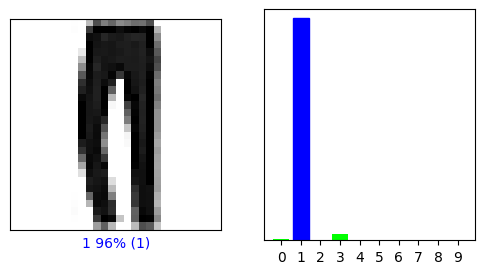

<Figure size 640x480 with 0 Axes>

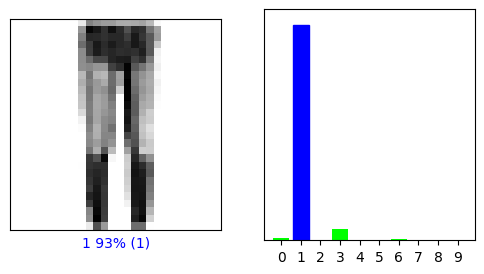

<Figure size 640x480 with 0 Axes>

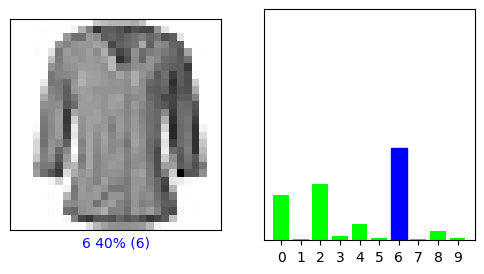

Caso 8
313/313 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

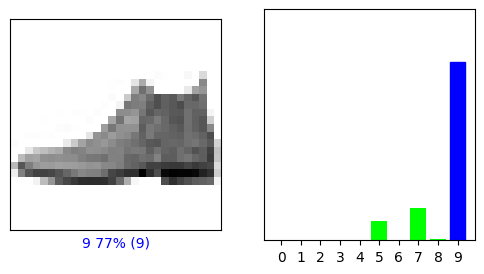

<Figure size 640x480 with 0 Axes>

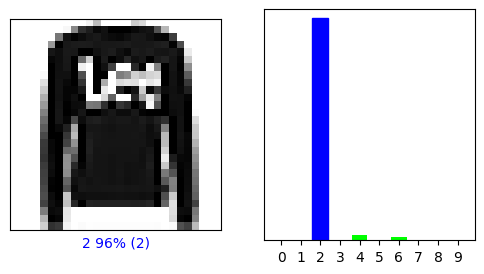

<Figure size 640x480 with 0 Axes>

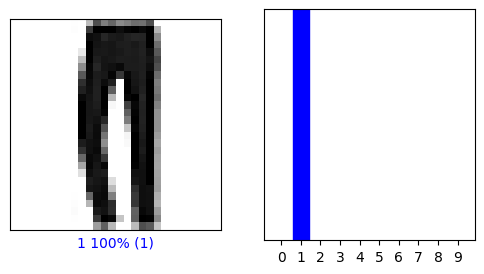

<Figure size 640x480 with 0 Axes>

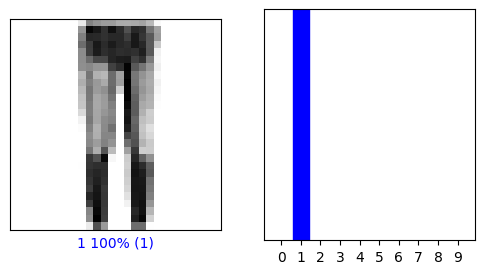

<Figure size 640x480 with 0 Axes>

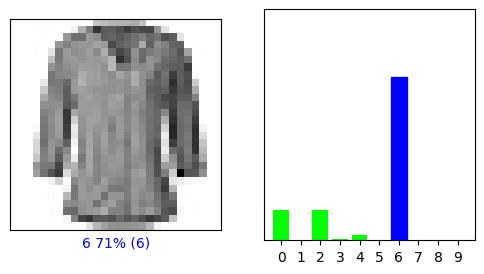

<Figure size 640x480 with 0 Axes>

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

for modelo,nombre_modelo in modelos:
  print(nombre_modelo)
  predictions = modelo.predict(test_images)
  for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

**7 . Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea
tus reflexiones respecto al resultado.**

**OPTIMIZADOR ADAM**

<p align="justify">
Adam (Adaptive Moment Estimation) es un algoritmo de optimización utilizado en el entrenamiento de redes neuronales.  Estos últimos años ha ganado popularidad debido a las ventajas con las que cuenta con respecto a otros algoritmos tradicionales.  Es un algoritmo de optimización de la tasa de aprendizaje adaptativo diseñado para entrenar redes neuronales profundas.  
La característica distintiva de Adam es que combina las ventajas de dos otros algoritmos de optimización muy populares: el descenso de gradiente estocástico (SGD) con momento y el método de RMSprop (Root Mean Square Propagation). La idea clave de Adam es calcular las tasas de aprendizaje para cada parámetro en función del primer y segundo momento de los gradientes, que son estimaciones de la media y la varianza.  Esto permite una rápida convergencia.
El éxito de este algoritmo viene dado principalmente por su buen manejo de gradientes dispersos.  Por ejemplo, en programas que procesen lenguaje natural o que traten de visión artificial, los gradientes son escasos, pero con Adam el rendimiento puede ser bueno a pesar de esto.  Otra ventaja es la elección de parámetros, pues Adam no es sensible a los parámetros que establece el usuario.  
<p align="justify">
Pero no todo son ventajas, pues Adam también presenta ciertas limitaciones, por ejemplo la alta variación que puede tener al actualizar los parámetros (puede hacer que oscile el programa y no converja correctamente).  Esto puede mejorarse con AMSGrad, que lo que hace es introducir un valor máximo para estimar el 2º momento.
Componentes clave:

<p align="justify">
1. Momentum: utiliza un término de momento que ayuda a acelerar la convergencia. El momento se basa en la idea de que los gradientes previos influyan en los gradientes actuales. Esto ayuda a suavizar el proceso de actualización de los pesos y permite superar los óptimos locales en la función de pérdida.

<p align="justify">
2. RMSprop: también incorpora el método de RMSprop para adaptar la tasa de aprendizaje para cada parámetro de la red de manera individual. Esto es útil para el problema de gradientes de diferentes magnitudes en diferentes parámetros.

<p align="justify">
3. Bias Correction: Realiza una corrección de sesgo en las estimaciones del momento y la varianza, especialmente al comienzo del entrenamiento. Esto ayuda a que el algoritmo sea más estable en las primeras iteraciones.
El proceso general de actualización de los pesos en Adam se puede resumir en los siguientes pasos:

1. Calcular el gradiente de la función de pérdida con respecto a los parámetros de la red.

2. Calcular el momento y la estimación de la varianza del gradiente.

3. Aplicar las correcciones de sesgo en el momento y la varianza.

4. Actualizar los parámetros de la red utilizando el momento y la varianza adaptada junto con una tasa de aprendizaje.

**SPARSE_CATEGORICAL_CROSSENTROPY**

La función de pérdida 'Sparse Categorical Crossentropy' suele emplearse en problemas de clasificación multiclase en redes neuronales cuando las etiquetas proporcionadas están dispersas en lugar de con una codificación one-hot.

Las entradas de esta función son las etiquetas de clase, por ejemplo, si clasificamos imágenes en 10 clases, habría 10 entradas, e.g. del 0 al 9.  

Esta función calcula la pérdida comparando la distribución de probabilidad predicha con la etiqueta real.  La fórmula sería
$L(y_t,y_p) = -∑(y_t\cdot log(y_p))$
donde $y_t$ es el valor esperado e $y_p$ el valor obtenido.



In [ ]:
from keras.optimizers import Adam

def train_model_with_adam(neurons, activation, epochs, train_images, train_labels):
    modelo = models.Sequential()
    modelo.add(layers.Flatten(input_shape=train_images.shape[1:]))
    modelo.add(layers.Dense(neurons, activation=activation))
    modelo.add(layers.Dense(10, activation="softmax"))

    modelo.compile(optimizer=Adam(learning_rate=0.001),  # Utilizando el optimizador Adam con una tasa de aprendizaje de 0.001
                  loss="sparse_categorical_crossentropy",  # Utilizando la función de pérdida sparse_categorical_crossentropy
                  metrics=["accuracy"])

    modelo.fit(train_images, train_labels, epochs=epochs, batch_size=128)

    return modelo

# Entrenar el modelo con la nueva configuración
caso_mejorado = train_model_with_adam(10, 'sigmoid', 5, train_images, train_labels)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 1.3913 - accuracy: 0.6407
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8530 - accuracy: 0.7775
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6677 - accuracy: 0.8070
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5756 - accuracy: 0.8225
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5209 - accuracy: 0.8299


**Resultados del Modelo Original con SGD y categorical_crossentropy:**

Epoch 1: Pérdida = 2.2064, Precisión = 0.2502

Epoch 2: Pérdida = 1.9215, Precisión = 0.4909

Epoch 3: Pérdida = 1.6787, Precisión = 0.5903

Epoch 4: Pérdida = 1.4913, Precisión = 0.6426

Epoch 5: Pérdida = 1.3480, Precisión = 0.6668

<p align="justify">
Este modelo muestra un rendimiento limitado. La precisión inicial es baja, pero mejora gradualmente con cada época. Sin embargo, la pérdida sigue siendo relativamente alta al final del entrenamiento.

**Resultados del Modelo Mejorado con Adam y sparse_categorical_crossentropy:**

Epoch 1: Pérdida = 1.4187, Precisión = 0.6550

Epoch 2: Pérdida = 0.8728, Precisión = 0.7685

Epoch 3: Pérdida = 0.6819, Precisión = 0.8001

Epoch 4: Pérdida = 0.5856, Precisión = 0.8202

Epoch 5: Pérdida = 0.5313, Precisión = 0.8303

<p align="justify">
El modelo mejorado con Adam y 'sparse_categorical_crossentropy' muestra un rendimiento significativamente mejor en comparación con el modelo original. La precisión aumenta más rápidamente desde la primera época, y la pérdida disminuye de manera constante en cada época. Esto sugiere que el modelo aprende de manera más eficiente y efectiva con esta configuración.

<p align="justify">
El uso de Adam como optimizador parece ser una elección efectiva para este problema de clasificación. Adam ajusta automáticamente la tasa de aprendizaje y adapta los parámetros del modelo de manera más eficiente, lo que contribuye a una convergencia más rápida y un mejor rendimiento en términos de precisión y pérdida.

<p align="justify">
La elección de 'sparse_categorical_crossentropy' es apropiada cuando se trabajan con etiquetas de clases representadas como enteros. Esto simplifica el procesamiento de etiquetas y, en este caso, ha contribuido a una mejora en la precisión y la pérdida.

# Bibliografía
Torres, J. (2020). Python Deep Learning: Introducción práctica con Keras y TensorFlow 2. Alpha Editorial.

Chollet, F. (2017). Deep learning with Python. Simon and Schuster.

Müller, B., Reinhardt, J., & Strickland, M. T. (2012). Neural networks: An Introduction. Springer Science & Business Media.